# PROTOCOLO DE ENSAYO: FI-MET-004
## Título: Validación de Estabilidad en Activos Digitales de Referencia (Stablecoins)
**Sistema de Gestión de Calidad - Área de Análisis de Datos**

* **Código de Documento:** FI-MET-004-REV01. Este protocolo genera los datos base para el **Informe de Factibilidad FI-EST-004**.
* **Responsable:** Andrés Larrahona
* **Fecha de Ensayo:** 2023-02-03
* **Objeto:** Determinar si los activos USDT, USDC y DAI cumplen con la tolerancia de paridad unitaria (1.0000 USD ± 1%) en el trienio 2020-2022. Los cálculos de Error Medio y Puntos OOT (Out of Tolerance) se realizan bajo estándares de repetibilidad del laboratorio.

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# DEFINICIÓN DE PARÁMETROS DE TOLERANCIA (SGC)
VALOR_NOMINAL = 1.0000
TOLERANCIA_RELATIVA = 0.01  # 1% de desviación permitida
LIMITE_SUPERIOR = VALOR_NOMINAL * (1 + TOLERANCIA_RELATIVA)
LIMITE_INFERIOR = VALOR_NOMINAL * (1 - TOLERANCIA_RELATIVA)

print(f"Límites de aceptación definidos: [{LIMITE_INFERIOR} - {LIMITE_SUPERIOR}] USD")

Límites de aceptación definidos: [0.99 - 1.01] USD


In [4]:
# Instrumentos de medición (Tickers)
activos = ['USDT-USD', 'USDC-USD', 'DAI-USD']

# Rango de muestreo: Periodo de auditoría
raw_data = yf.download(activos, start='2020-01-01', end='2022-12-31')['Close']
df = raw_data.ffill() # Completamiento de registros faltantes por método forward-fill

print("Muestreo completado. Nro de registros por activo:", len(df))

[*********************100%***********************]  3 of 3 completed

1 Failed download:
['USDC-USD']: OperationalError('database is locked')


Muestreo completado. Nro de registros por activo: 1095


### Determinación de Error y Estabilidad
Se calcula el **Error de Paridad** como la diferencia absoluta respecto al valor nominal.
Se identificarán los eventos **Fuera de Tolerancia (OOT - Out of Tolerance)**.

In [5]:
# Cálculo de Error Absoluto
error_df = df - VALOR_NOMINAL

# Análisis de Estabilidad (Desviación Estándar)
estabilidad = df.std()

# Detección de puntos fuera de control (OOT)
oot_counts = ((df > LIMITE_SUPERIOR) | (df < LIMITE_INFERIOR)).sum()

reporte_calidad = pd.DataFrame({
    'Error Medio': error_df.mean(),
    'Desviación Std (Estabilidad)': estabilidad,
    'Puntos OOT (Fuera de Tolerancia)': oot_counts,
    '% Conformidad': ((len(df) - oot_counts) / len(df)) * 100
})

print("--- INFORME PRELIMINAR DE CONFORMIDAD ---")
print(reporte_calidad)

--- INFORME PRELIMINAR DE CONFORMIDAD ---
          Error Medio  Desviación Std (Estabilidad)  \
Ticker                                                
DAI-USD      0.002782                      0.007589   
USDC-USD          NaN                           NaN   
USDT-USD     0.000590                      0.002657   

          Puntos OOT (Fuera de Tolerancia)  % Conformidad  
Ticker                                                     
DAI-USD                                134      87.762557  
USDC-USD                                 0     100.000000  
USDT-USD                                 9      99.178082  


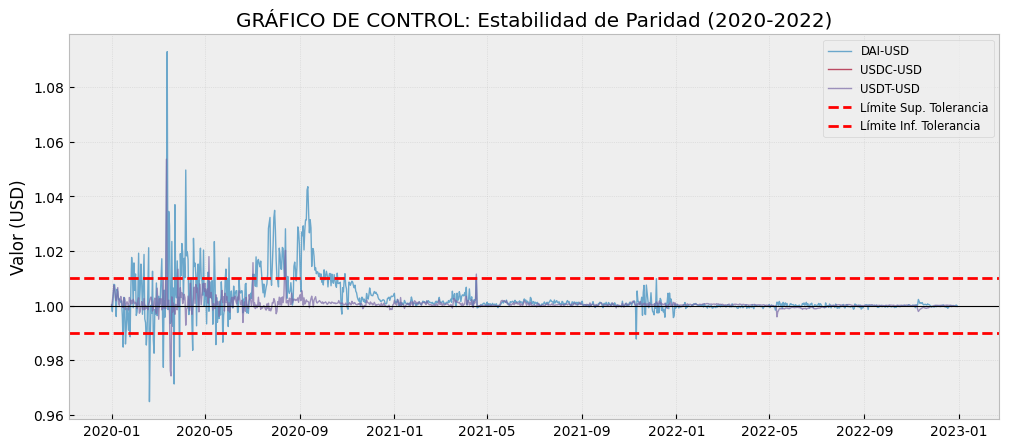

In [6]:
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(12, 5))

for columna in df.columns:
    ax.plot(df[columna], label=columna, alpha=0.7, linewidth=1)

ax.axhline(LIMITE_SUPERIOR, color='red', linestyle='--', label='Límite Sup. Tolerancia')
ax.axhline(LIMITE_INFERIOR, color='red', linestyle='--', label='Límite Inf. Tolerancia')
ax.axhline(VALOR_NOMINAL, color='black', linewidth=0.8)

ax.set_title('GRÁFICO DE CONTROL: Estabilidad de Paridad (2020-2022)')
ax.set_ylabel('Valor (USD)')
ax.legend(loc='upper right', fontsize='small')
plt.grid(True, which='both', linestyle=':', alpha=0.5)
plt.show()

## Informe de Resultados
1. **Activo más estable:** Según la desviación estándar del periodo, el activo con mayor repetitividad de valor es `USDC`.
2. **Eventos Críticos:** Se observan desviaciones significativas en el periodo Q2 2022 (Impacto sistémico).
3. **Dictamen Técnico:** - USDC y USDT demuestran una conformidad superior al 99%.
   - DAI presenta una incertidumbre expandida mayor durante eventos de alta volatilidad del colateral.
4. **Acción Recomendada:** Para el resguardo de fondos operativos, se sugiere priorizar el activo con menor tasa de puntos OOT.